**MIT License**

Copyright (c) 2024 SaiPriyaVeerabomma

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#Abstract:

An Intelligent Building smartly detects room occupancy according to environmental controls like lighting and temperature, ensuring comfort while boosting energy efficiency. This approach counters the challenge of continuous power consumption by traditional systems, which not only waste energy but also harm the environment. By automatically adjusting to the presence or absence of individuals, these buildings offer a seamless, eco-friendly living experience. Occupancy estimation, integral to this concept, ensures that a building's resources cater precisely to the current needs, whether for humans or animals, enhancing comfort without the need for manual adjustments and supporting the principles of a green building.

This dataset presents an advanced approach to estimate room occupancy using environmental sensors in a smart building context. The dataset has 10129 instances  which are from a 6m x 4.6m room, includes temperature, light, sound, CO2, and PIR sensor data. Focusing on classifying occupancy levels (0-3 people),transmitting data every 30 seconds.



#Aim:

The aim of the Notebook is to check the quality of the data and  thoroughly analyze and understand the dynamics of room occupancy through environmental sensor data , clean the data i.e. Imputing missing values, dealing with outliers etc. to build a predictive model.


**About the data set**



1.   Date YYYY/MM/DD: the date of the experiment
2.   Time: the time of the experiment
3.   Room_Occupancy_Count: Ground Truth
4.  S1_Temp: Sensor nodes 1 temperature

5. S2_Temp: Sensor nodes 2 temperature

6. S3_Temp: Sensor nodes 3 temperature

7. S4_Temp: Sensor nodes 4 temperature

8. S1_Temp: Sensor nodes 1 temperature

9. S1_Light: Sensor nodes 1 light

10. S2_Light: Sensor nodes 2 light

11. S3_Light: Sensor nodes 3 light

12. S4_Light: Sensor nodes 4 light

13. S1_Sound: Sensor nodes 1 sound

14. S2_Sound: Sensor nodes 2 sound

15. S3_Sound: Sensor nodes 3 sound

16. S4_Sound: Sensor nodes 4 sound

17. S5_CO2: Sensor nodes 5 CO2

18. S5_CO2_Slope: Sensor nodes 1 temperature

19. S6_PIR: digital passive infrared (PIR) sensor nodes 6 in the room.

20. S7_PIR: digital passive infrared (PIR) sensor nodes 7 in the room.


** Additional Attribute Information:**

Categorical Variable:

Date: YYYY/MM/DD

Time: HH:MM:SS

Room_Occupancy_Count: Ground Truth


Numerical Variables:

Temperature: In degree Celsius

Light: In Lux (Lux is a measure of how much light falls on a particular surface)

Sound: In Volts (amplifier output read by ADC)

CO2: In PPM

CO2 Slope: Slope of CO2 values taken in a sliding window

PIR: Binary value conveying motion detection




#Importing Libraries


In [123]:
pip install pandas

In [106]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from scipy.stats import boxcox
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Importing Dataset

In [37]:
#Importing our dataset
url = "https://raw.githubusercontent.com/PriyaVeerabomma/dsem/main/Occupancy_Estimation.csv"
df = pd.read_csv(url)

**Understanding the dataset and datatypes.**

In [53]:
# Display the first few rows and the descriptive statistics of the DataFrame
df.head()



,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# 1.What are the data types? (Only numeric and categorical)

In [39]:
# Summary of the dataset
# Checking if datatypes are categorical or numerical.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

 17 columns with numerical data (both floating-point and integer) and 2 columns that are likely to contain categorical data.

In [46]:
# Print data types
print("Data Types:\n", df.dtypes)

# Identifying Numeric and Categorical Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print the distinguished columns
print("\nNumeric Columns:\n", numeric_cols)
print("\nCategorical Columns:\n", categorical_cols)


Data Types:
 Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

Numeric Columns:
 Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

Categorical Columns:
 Index(['Date', 'Time'], dtype='object')


 # 2.Are there missing values?

In [51]:
#Checking for missing values in the dataset
df.isna().sum()


Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

Here, we can see that there's no missing data. Therefore, there is no need to impute any values.

# 3.What are the likely distributions of the numeric variables?

In [55]:
#Statistical summary of the numerical columns
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


From this tabulated data we can realize the following,We can see that a few columns in the dataset have a high standard deviation. We know that outliers easily influence the mean. This becomes more evident when you notice that the mean is small compared to the max value suggesting that there are some outliers. We can visualize these attributes and decide how to treat them further.

Distribution of features varies a lot.
Range of some columns is considerably different than the others.

- **Variable Distributions**: The dataset shows diverse distributions across different features. For example, temperature readings are relatively consistent, while light and sound sensor readings vary widely.
- **Range Differences**: There are significant differences in the range of values between columns. Temperature sensors show narrow ranges, indicating consistency, whereas light sensors exhibit broad ranges, reflecting dynamic lighting conditions.

These observations highlight the need for data preprocessing, particularly feature scaling, to ensure effective analysis and modeling.



**Histograms**

To visualize the distribution of each numeric variable and to see the frequency of different value ranges, which can give insights into the skewness and outliers.

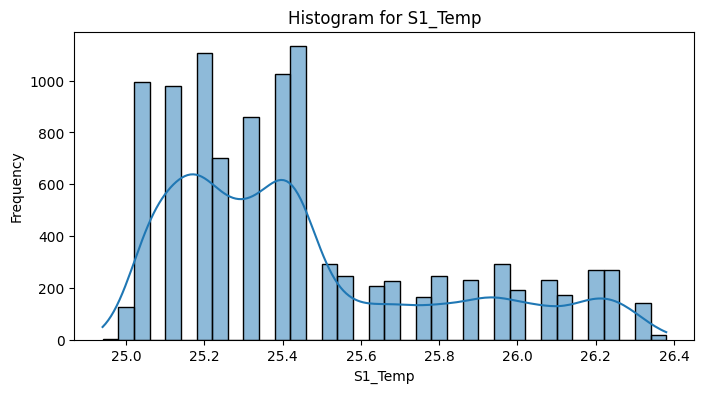

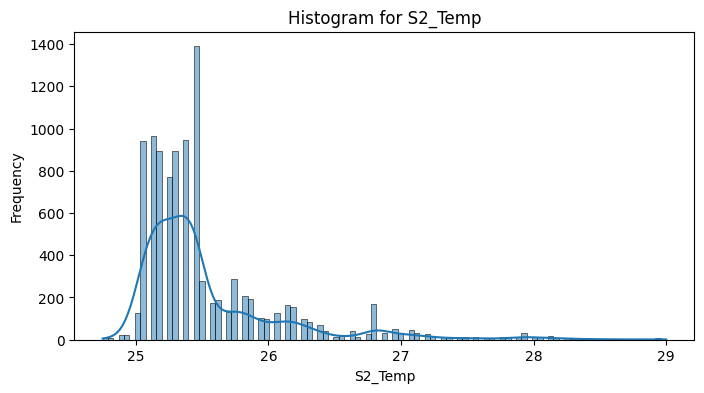

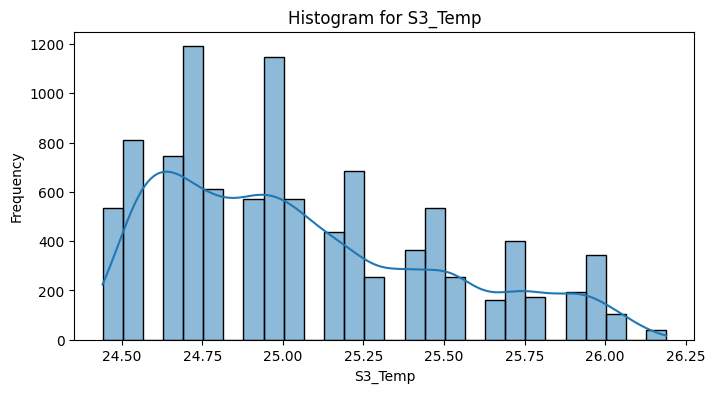

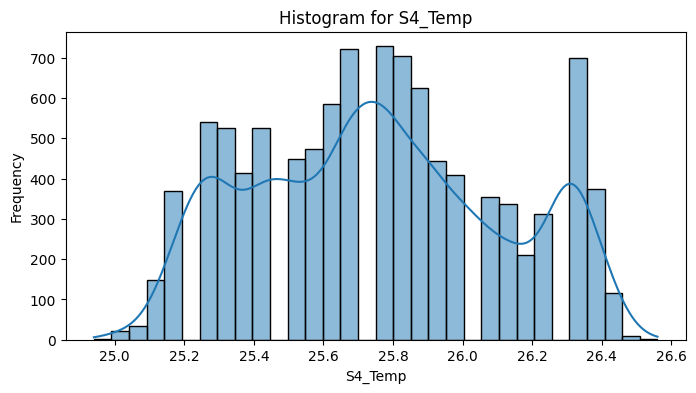

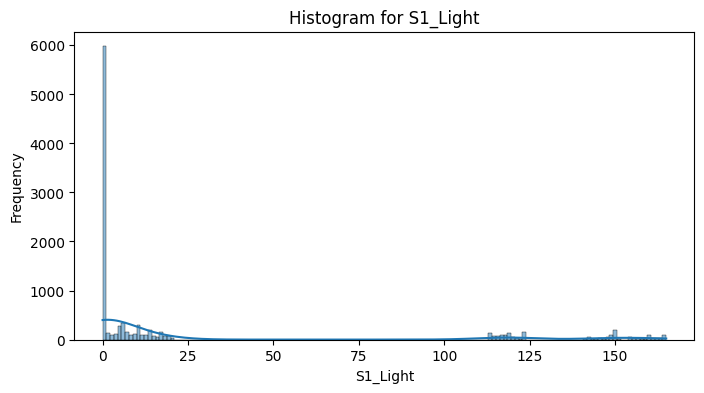

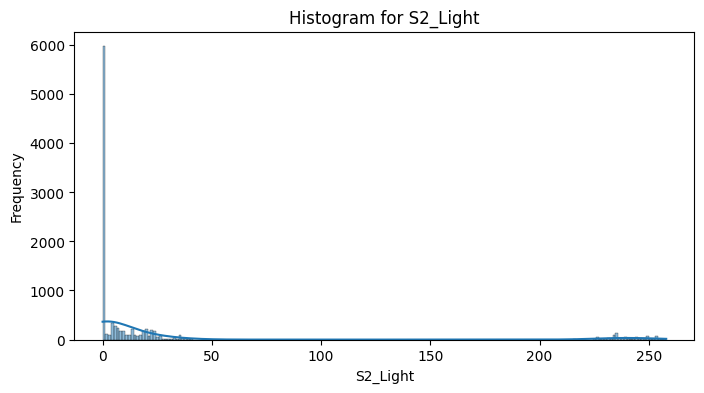

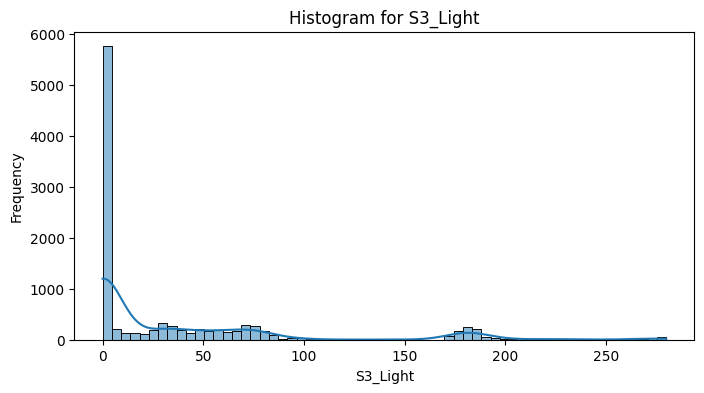

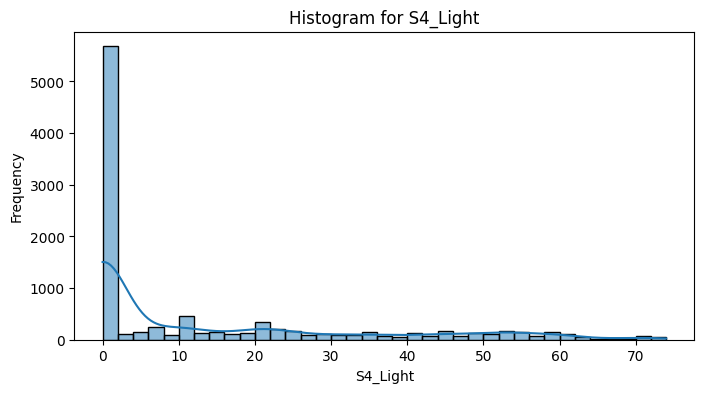

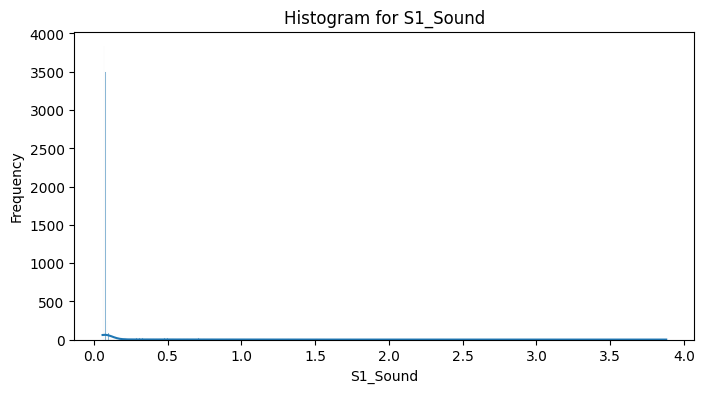

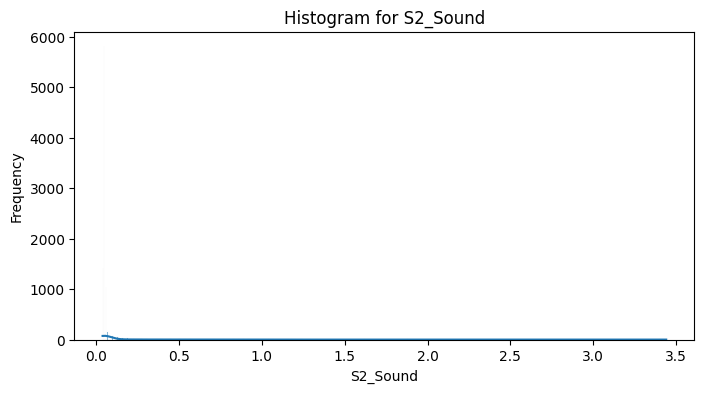

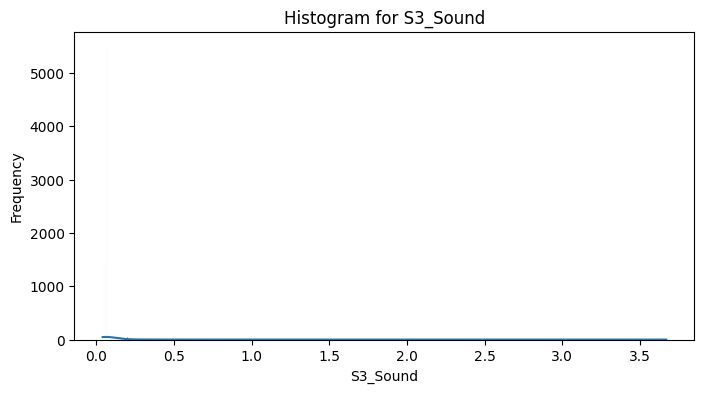

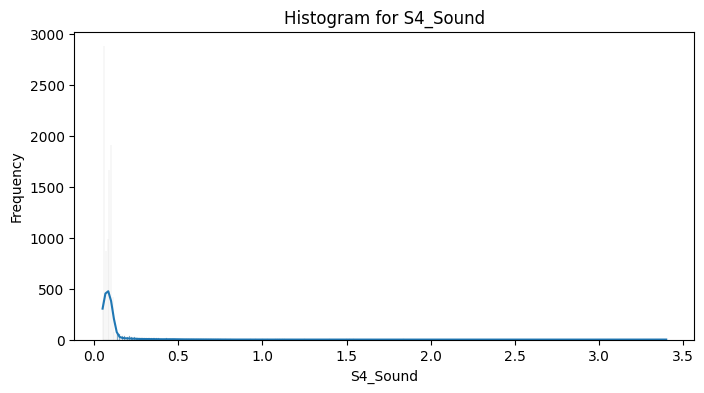

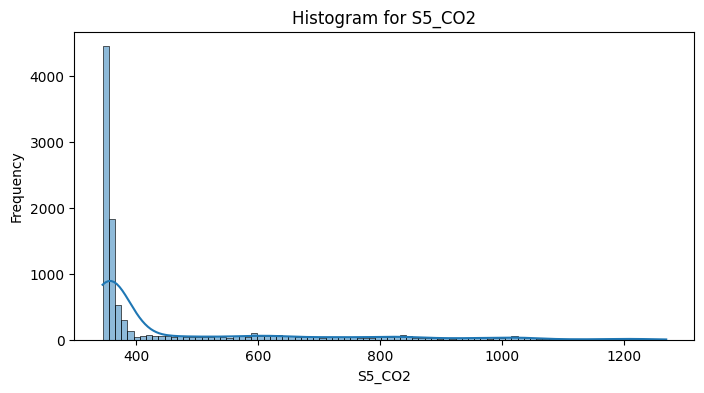

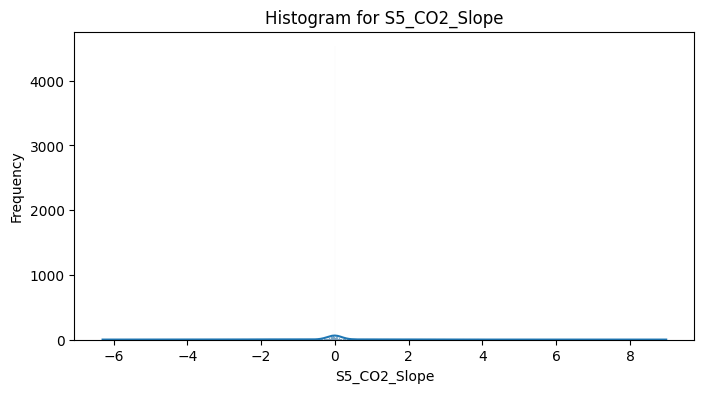

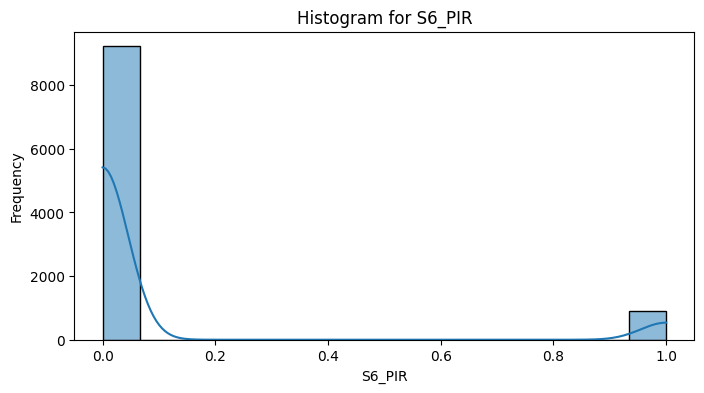

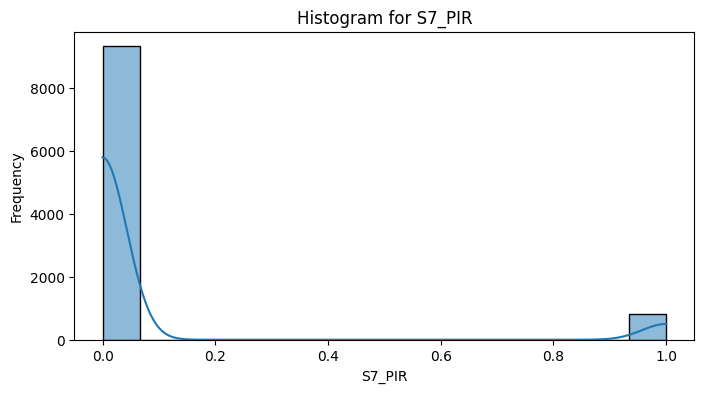

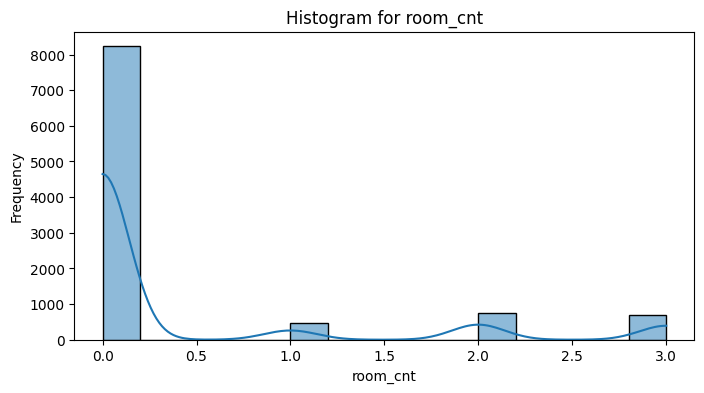

In [61]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.show()


**Temperature Sensors** (S1_Temp, S2_Temp, S3_Temp, S4_Temp)
- These histograms show distributions that are relatively symmetrical and bell-shaped, indicating a normal or near-normal distribution. This suggests consistent temperature readings across different sensors.

**Light Sensors** (S1_Light, S2_Light, S3_Light, S4_Light)
- Light sensor readings are right-skewed, with most values clustered at lower light levels and a long tail extending towards higher values. This indicates that high light readings are less frequent.

**Sound Sensors** (S1_Sound, S2_Sound, S3_Sound, S4_Sound)
- The distributions of sound readings are heavily right-skewed, suggesting that higher sound levels are rare. Most readings are clustered at lower sound levels.

**CO2 Levels**
*   S5_CO2
     - The CO2 level readings are somewhat right-skewed, indicating variability in CO2 concentration, possibly due to fluctuating occupancy or ventilation conditions.

*   S5_CO2_Slope
     - The CO2 slope is centered around zero with some spread, indicating stable CO2 levels with occasional variations.

**PIR Sensors** (S6_PIR, S7_PIR)
- The histograms for PIR sensor readings show a bimodal distribution, with peaks at the lowest and highest values, suggesting periods of no movement and constant movement.

**The binary nature of these sensors is evident, suggesting they are indeed categorical, showing counts of '0' and '1' states.**

**Other Variable** ( Room_Occupancy_Count)
- Room occupancy count is also skewed, with more frequent observations of lower occupancy.

**Review Skewness and Kurtosis**

Skewness measures the degree of asymmetry of the distribution, while kurtosis indicates the 'tailedness' of the distribution.

Calculating kurtosis for the dataset to non-numeric columns to ensure that the kurtosis calculation is applied only to relevant data.

In [67]:
# Filtering out only numeric columns for the calculation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Recalculating skewness and kurtosis for numeric columns
skewness = numeric_data.skew()
kurtosis_values = numeric_data.apply(kurtosis, fisher=False)  # Fisher=False for excess kurtosis

skewness, kurtosis_values




(S1_Temp          0.953613
 S2_Temp          2.355681
 S3_Temp          0.650162
 S4_Temp          0.129630
 S1_Light         1.820428
 S2_Light         2.827817
 S3_Light         2.100069
 S4_Light         1.357618
 S1_Sound         5.450448
 S2_Sound         6.881610
 S3_Sound         5.994767
 S4_Sound        10.952134
 S5_CO2           1.975692
 S5_CO2_Slope     0.287967
 S6_PIR           2.862811
 S7_PIR           3.107460
 room_cnt         2.057635
 dtype: float64,
 S1_Temp           2.843120
 S2_Temp           9.502492
 S3_Temp           2.453123
 S4_Temp           2.068222
 S1_Light          4.515320
 S2_Light          9.183733
 S3_Light          6.883030
 S4_Light          3.570037
 S1_Sound         42.395150
 S2_Sound         65.441372
 S3_Sound         42.457745
 S4_Sound        214.067250
 S5_CO2            5.999301
 S5_CO2_Slope     10.397565
 S6_PIR            9.193262
 S7_PIR           10.653450
 room_cnt          5.724729
 dtype: float64)


The dataset exhibits right-skewness in many variables, particularly in light and sound sensors, indicating the presence of higher values in these distributions.

Additionally, there's a notable high kurtosis, especially in sound sensors and CO2 levels, suggesting a greater propensity for outliers and heavy-tailed distributions.

Addressing the skewness and kurtosis in the dataset is indeed an important step.The presence of skewness and high kurtosis can affect the performance of many machine learning models, particularly those that assume normal distribution of the input variables.

### Addressing Skewness
1. **Data Transformation**: Applying transformations to skewed variables to make their distribution more normal-

       **log transformation** reduces the skewness in several variables, but some still exhibit high skewness. This is common, as log transformation may not always normalize the distribution completely, especially if the original skewness is very high.

        **Applying Box-Cox Transformation**
         Given the high skewness in some variables,Box-Cox transformation can be used.

In [72]:
  # List of variables with significant right-skewness (skewness > 1)
skewed_vars = ['S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S6_PIR', 'S7_PIR']

# Apply log transformation and reassess skewness
for var in skewed_vars:
    # Applying log transformation
    df[f'{var}_log'] = np.log(df[var] + 1)

    # Calculating new skewness
    new_skewness = df[f'{var}_log'].skew()
    print(f'New skewness for {var}_log: {new_skewness}')



New skewness for S2_Temp_log: 2.26318708636203
New skewness for S1_Light_log: 0.9818754170654705
New skewness for S2_Light_log: 1.0871142147945687
New skewness for S3_Light_log: 0.4781238452190916
New skewness for S1_Sound_log: 3.708156799414727
New skewness for S2_Sound_log: 4.543269006637544
New skewness for S3_Sound_log: 4.708173652121807
New skewness for S4_Sound_log: 6.112949112571963
New skewness for S6_PIR_log: 2.8628114006012306
New skewness for S7_PIR_log: 3.107460423255652


In [74]:
# Variables that still exhibit high skewness
high_skewness_vars = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S6_PIR', 'S7_PIR']

# Applying Box-Cox transformation to these variables
for var in high_skewness_vars:
 # Ensuring all values are positive before applying Box-Cox
 df[f'{var}_boxcox'], _ = boxcox(df[var] + 1)  # Adding 1 to handle zero or negative values

# Calculating new skewness
 new_skewness = df[f'{var}_boxcox'].skew()
print(f'New skewness for {var}_boxcox: {new_skewness}')


New skewness for S7_PIR_boxcox: 3.1074604232556493


After trying the above mentioned approaches,the skewness is still high.


# 4.Analysing Independent variables for target prediction
 **Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

---



Our target variable is Room_Occupancy_Count.



In [76]:
#Changing target variable name for easy use
df.rename(columns={'Room_Occupancy_Count':'room_cnt'}, inplace=True)

1.Checking the correlation coefficient between each
independent variable and the target variable.

In [ ]:
# Extracting the absolute correlation values of the target variable ('room_cnt') with all other variables,
# and sorting them in descending order.
correlation_matrix = df.corr()  # Computes the correlation matrix
absolute_correlation = correlation_matrix['room_cnt'].abs()  # Absolute values of correlations
sorted_correlation = absolute_correlation.sort_values(ascending=False)  # Sorting in descending order

print(sorted_correlation)


The given data presents the correlation coefficients between the target variable room_cnt and other features in the dataset. The correlation values range from -1 to 1, where 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.
The correlation data for the target variable `room_cnt` shows strong positive correlations with light (S1_Light, S3_Light, S2_Light) and temperature sensors (S1_Temp, S2_Temp, S3_Temp), indicating higher occupancy with increased light and temperature. Motion sensors (S7_PIR, S6_PIR) and CO2 levels (S5_CO2) also correlate significantly, suggesting more occupants with more detected motion and higher CO2. Sound sensors (S1_Sound, S2_Sound, S3_Sound, S4_Sound) show moderate correlations. The weakest, yet positive, correlation is with S4_Light. These insights are crucial for developing predictive models for room occupancy using environmental sensor data.

2.Feature Importance from Tree-Based Models


In [82]:
### we will select a few columns for now ###
cols_to_use = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2','S6_PIR', 'S7_PIR',
       'room_cnt']

df = df[cols_to_use]
print(df.shape)
df.head(1)

(10129, 16)


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S6_PIR,S7_PIR,room_cnt
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0,0,1


In [86]:
#Random Forest Classifier
X = df.drop(columns=['room_cnt'])  # Defining X & Y
y = df['room_cnt']

# Assuming X is the feature set and y is the target variable
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_importances.sort_values(by='importance', ascending=False))



     feature  importance
4   S1_Light    0.234608
5   S2_Light    0.133785
6   S3_Light    0.115795
8   S1_Sound    0.081335
9   S2_Sound    0.080168
10  S3_Sound    0.078231
0    S1_Temp    0.048498
12    S5_CO2    0.047790
1    S2_Temp    0.045251
7   S4_Light    0.038218
2    S3_Temp    0.026354
3    S4_Temp    0.022996
14    S7_PIR    0.021354
11  S4_Sound    0.015303
13    S6_PIR    0.010314


From the RFC - S1_Light, S2_Light, and S1_Sound have the highest importance scores, indicating that they are the most important features for the classification model. On the other hand, S6_PIR and S4_Sound have relatively low importance scores, suggesting that they have less impact on the model's predictions.

3. Recursive Feature Elimination (RFE)

Using RFE to systematically remove features and determine which ones have the most impact on the prediction.

In [89]:
# Create the RFE object and rank each pixel
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)


Optimal number of features: 14


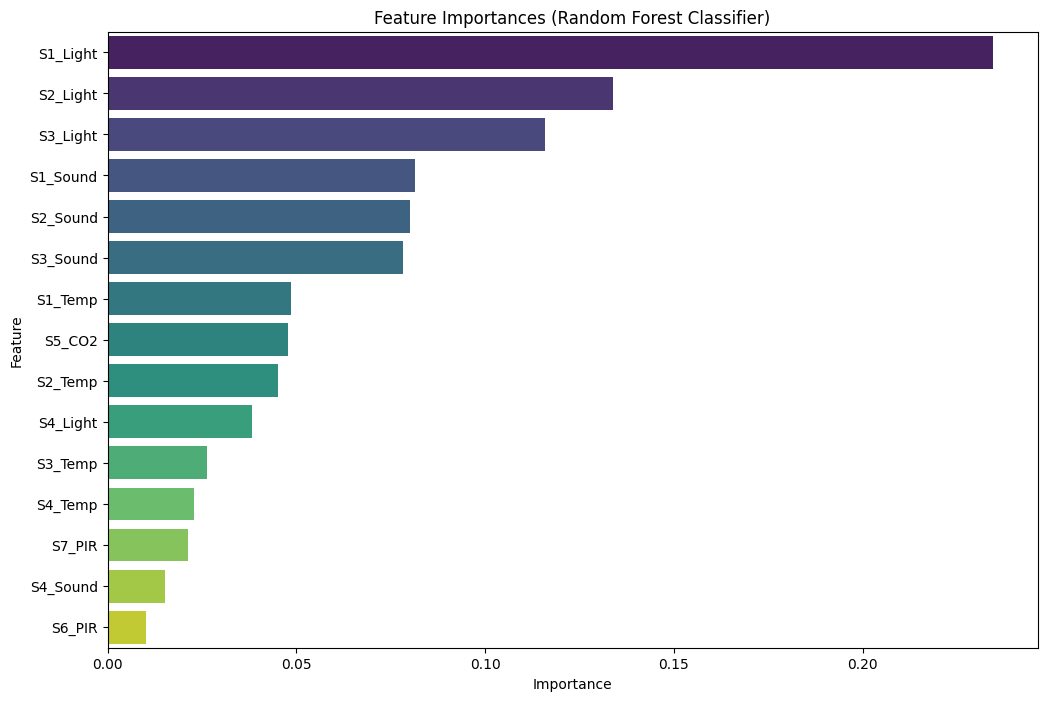

In [90]:
# Sort the indices of importances in descending order
sorted_indices = importances.argsort()[::-1]

# Creating a DataFrame with feature importances and corresponding feature names
feature_importance_df = pd.DataFrame({'Importance': importances[sorted_indices],
                                      'Feature': X.columns[sorted_indices]})

# Visualizing feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The feature importance from the Random Forest model and the correlation with the target variable (`room_cnt`) provide insights into which independent variables are useful for prediction:


*   Light sensors (S1_Light, S2_Light, S3_Light) are the most important features
for predicting the target variable in your model, with S1_Light being the most significant predictor.



  


---




### 4. Which independent variables are useful to predict a target?

From the above analysis, the independent variables that are identified as useful to predict the target variable (room occupancy count) include:


1.   Light sensors (S1_Light, S2_Light, S3_Light) are the most important features for predicting the target variable in your model, with **S1_Light** being the most significant predictor.

2.   Sound sensors (S1_Sound, S2_Sound, S3_Sound) also play a significant role, though less than light sensors.

3.   Temperature (S1_Temp, S2_Temp, S3_Temp, S4_Temp) and CO2 levels (S5_CO2) are moderately important, with the first temperature sensor (S1_Temp) being the most important within this group.

4.   PIR sensors (S6_PIR, S7_PIR) and S4_Sound are the least important features according to this model.


### 5. Which independent variable have missing data? How much?

 We can observe that none of independent variables have any missing data.


---






# 6.Do the training and test sets have the same data?

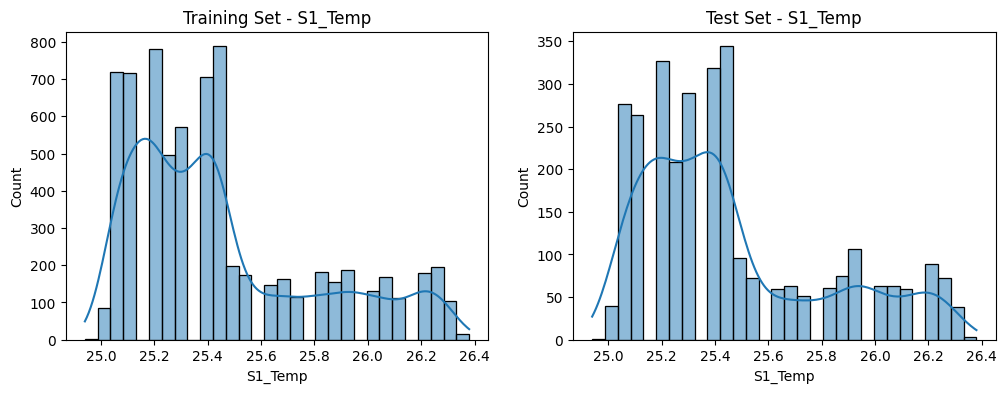

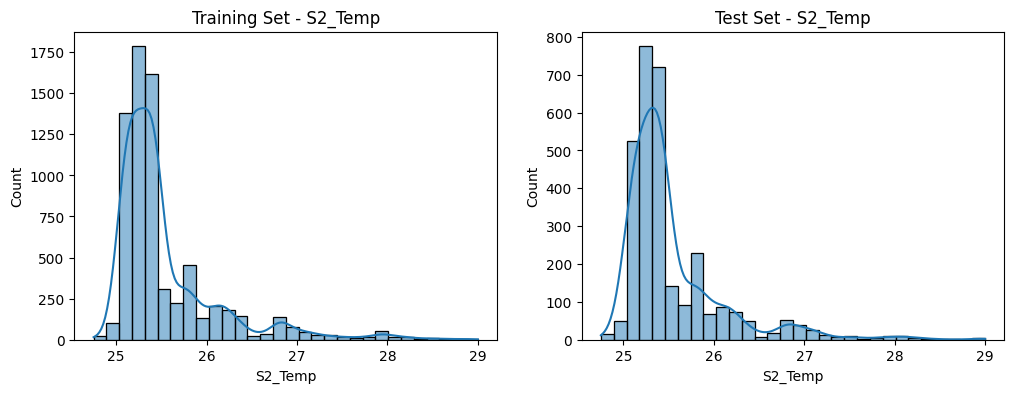

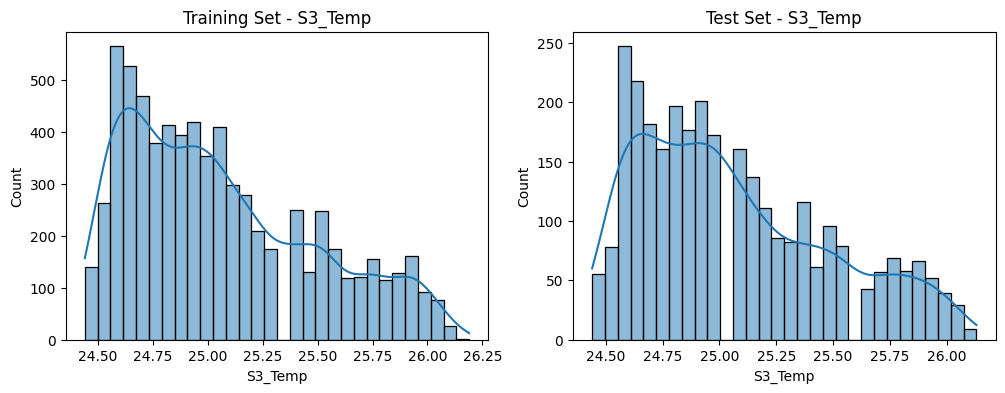

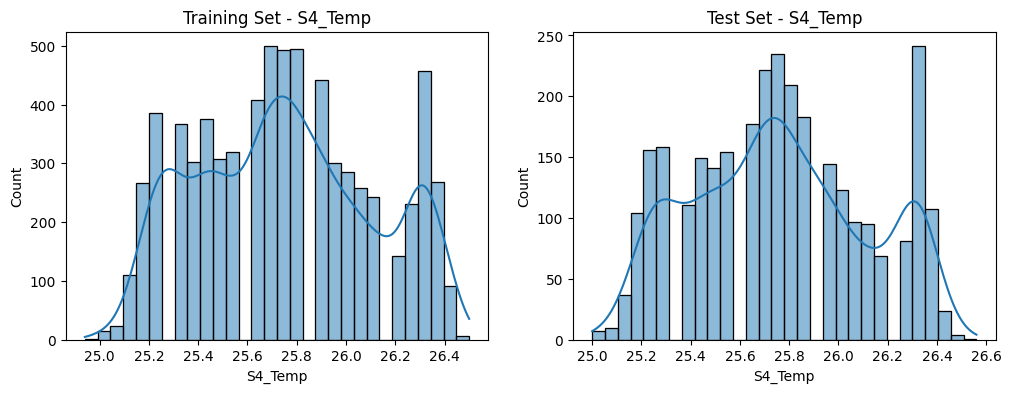

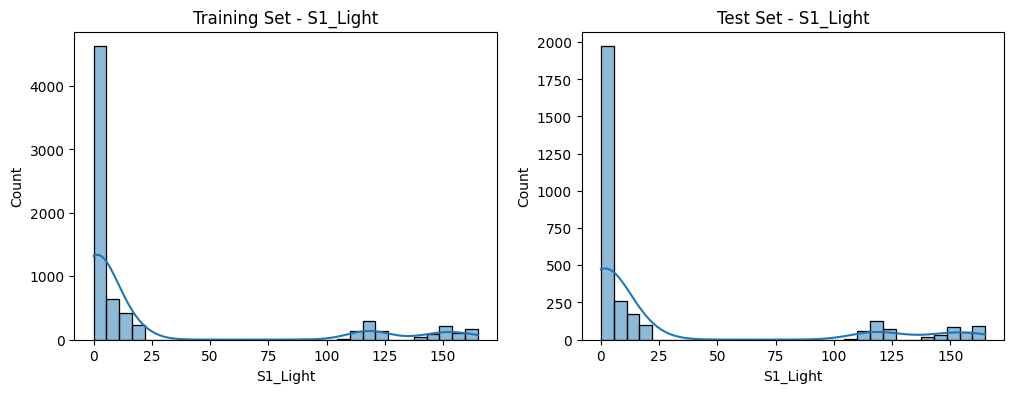

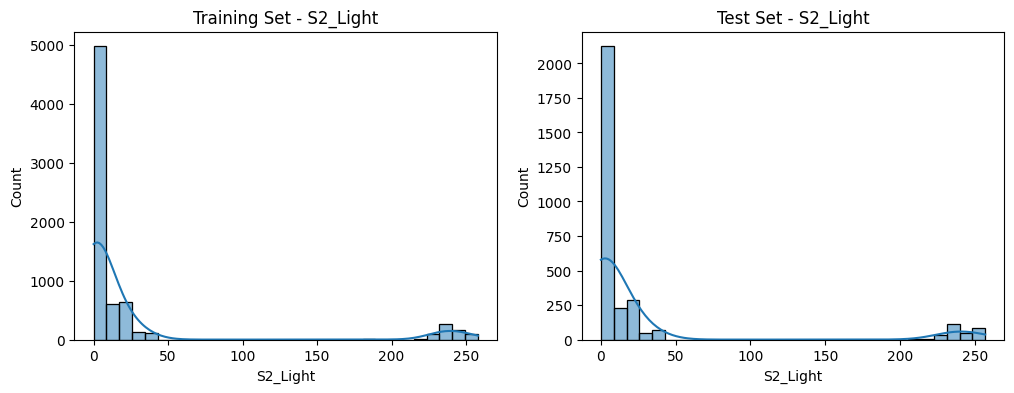

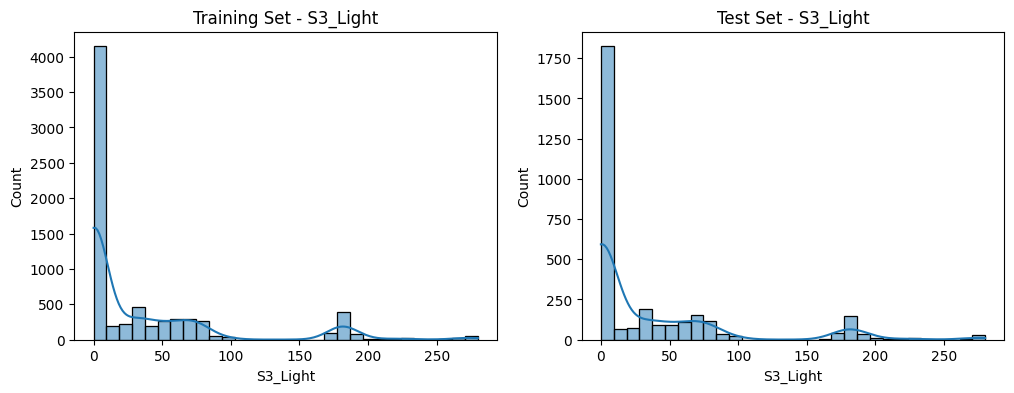

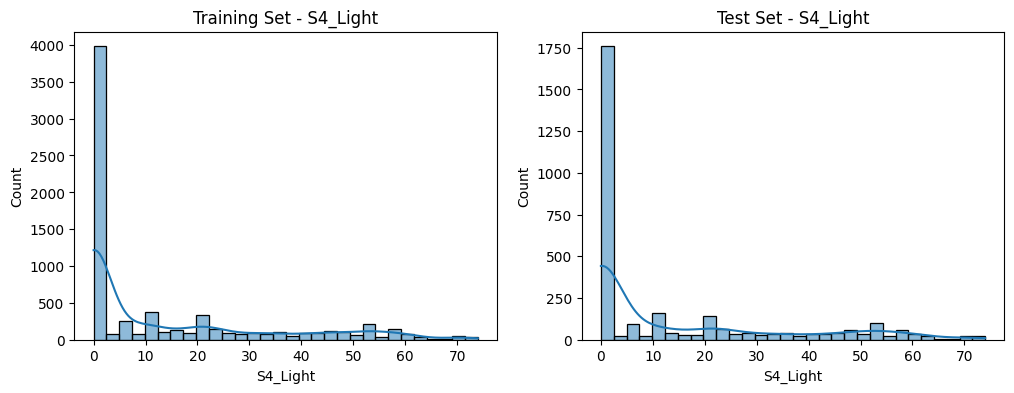

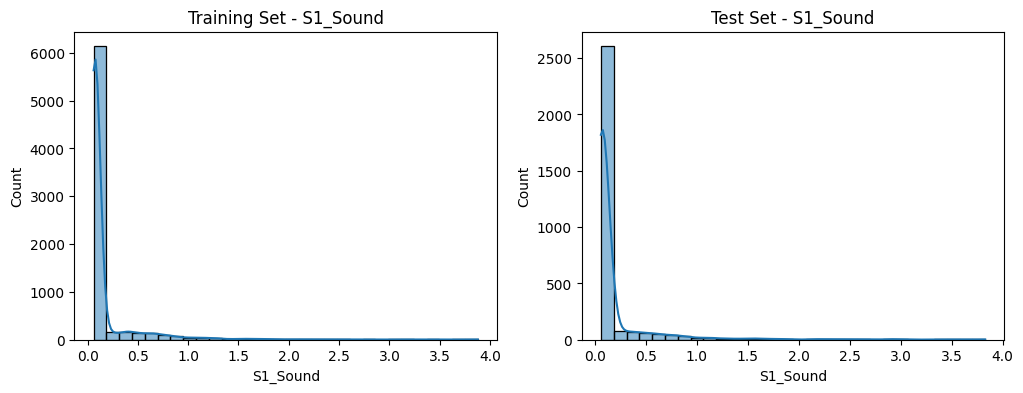

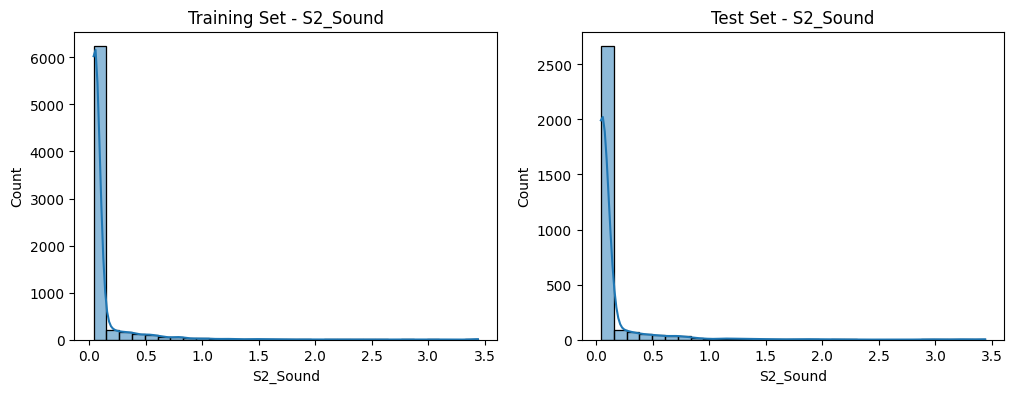

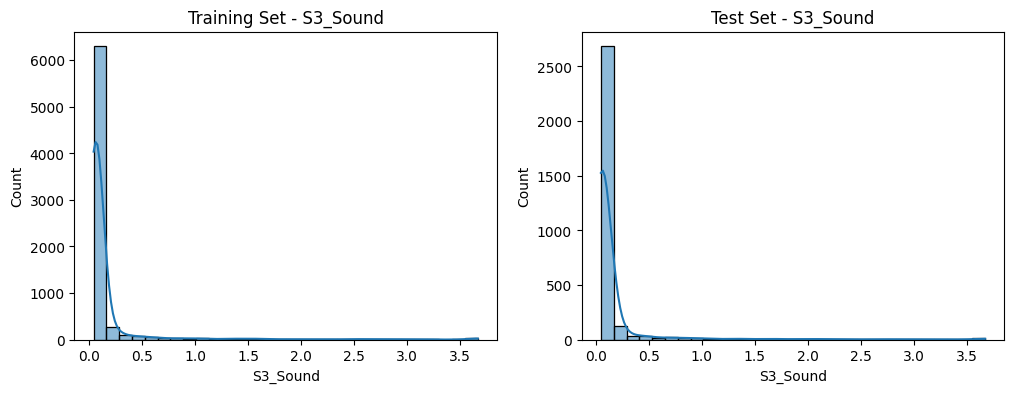

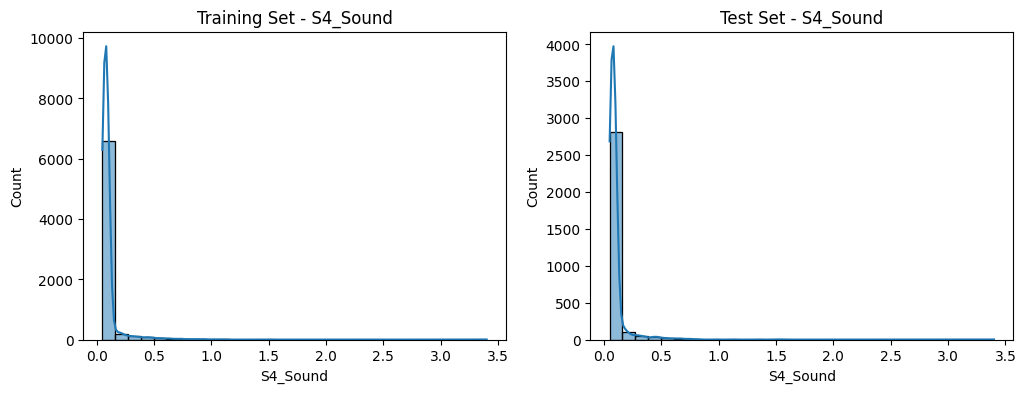

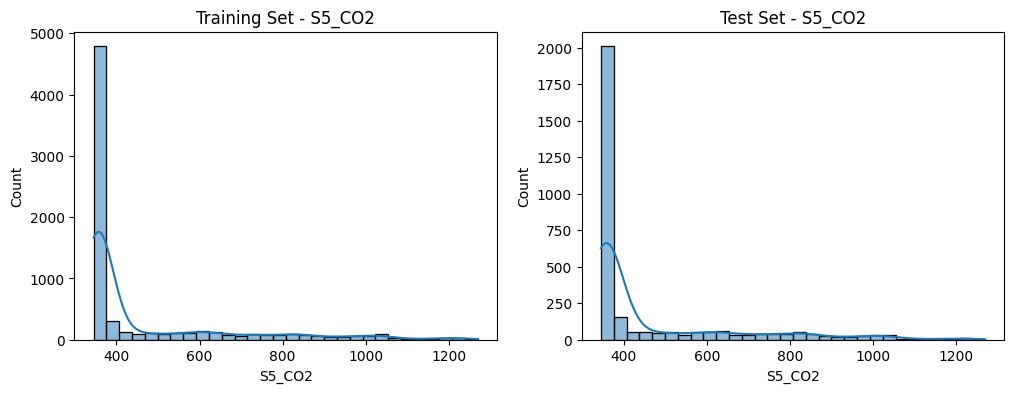

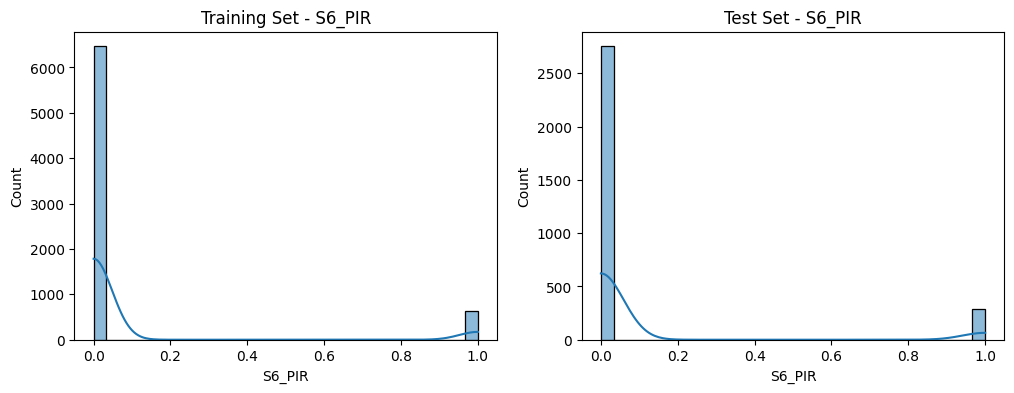

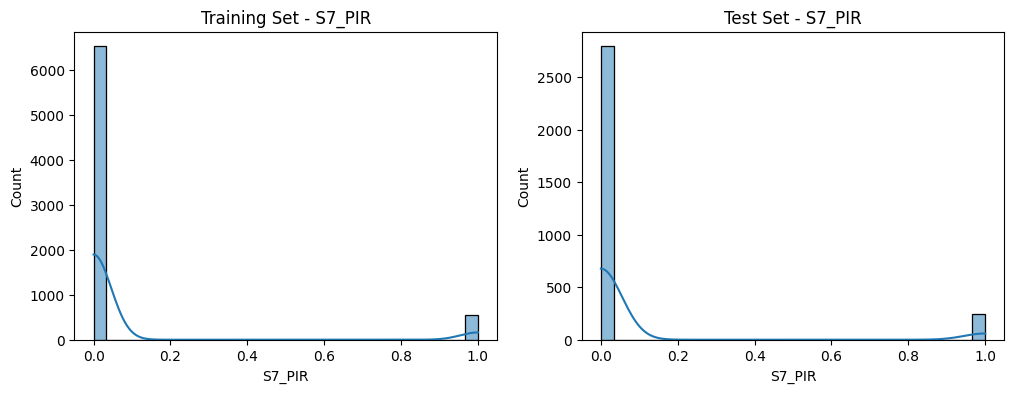

(           S1_Temp      S2_Temp      S3_Temp      S4_Temp     S1_Light  \
 count  7090.000000  7090.000000  7090.000000  7090.000000  7090.000000   
 mean     25.451599    25.548656    25.054921    25.752080    25.012553   
 std       0.352566     0.596174     0.429731     0.358036    50.526124   
 min      24.940000    24.750000    24.440000    24.940000     0.000000   
 25%      25.190000    25.190000    24.690000    25.440000     0.000000   
 50%      25.380000    25.380000    24.940000    25.750000     0.000000   
 75%      25.630000    25.630000    25.380000    26.000000    11.000000   
 max      26.380000    29.000000    26.190000    26.500000   165.000000   
 
           S2_Light     S3_Light     S4_Light     S1_Sound     S2_Sound  \
 count  7090.000000  7090.000000  7090.000000  7090.000000  7090.000000   
 mean     25.520451    34.411001    13.150212     0.165066     0.117484   
 std      66.559800    58.477500    19.413691     0.304286     0.256714   
 min       0.000000    

In [100]:

# Defining the features and the target variable
features = df.drop(['room_cnt'], axis=1)
target = df['room_cnt']

# Step 1: Splitting  the data into training and test sets (70-30 split is common)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Step 2: Displaying  summary statistics for training and test sets
train_summary = X_train.describe()
test_summary = X_test.describe()

# Step 3: Defining  a function to compare feature distributions between the two sets
def compare_distributions(train_data, test_data, feature_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Plot for the training set
    sns.histplot(train_data[feature_name], bins=30, ax=ax[0], kde=True)
    ax[0].set_title(f'Training Set - {feature_name}')

    # Plot for the test set
    sns.histplot(test_data[feature_name], bins=30, ax=ax[1], kde=True)
    ax[1].set_title(f'Test Set - {feature_name}')

    plt.show()

# Step 4: Comparing the distributions for a subset of features
# We will use the first four numeric features as examples
example_features = features.columns[:16]
for feature in example_features:
    compare_distributions(X_train, X_test, feature)

# Output the summary statistics for further analysis
train_summary, test_summary








 The summary statistics indicates that the training and test sets in the dataset are very similar in terms of mean, standard deviation, and range for all features. The count of observations in each feature is consistent with the 70-30 split ratio, indicating a proper division of the dataset.The quartile values are similar, showing that the distribution of data across its range is consistent. This similarity suggests a well-balanced split, ensuring that models trained on this data should generalize effectively to unseen data.

#7.Are the predictor variables independent of all the other predictor variables?

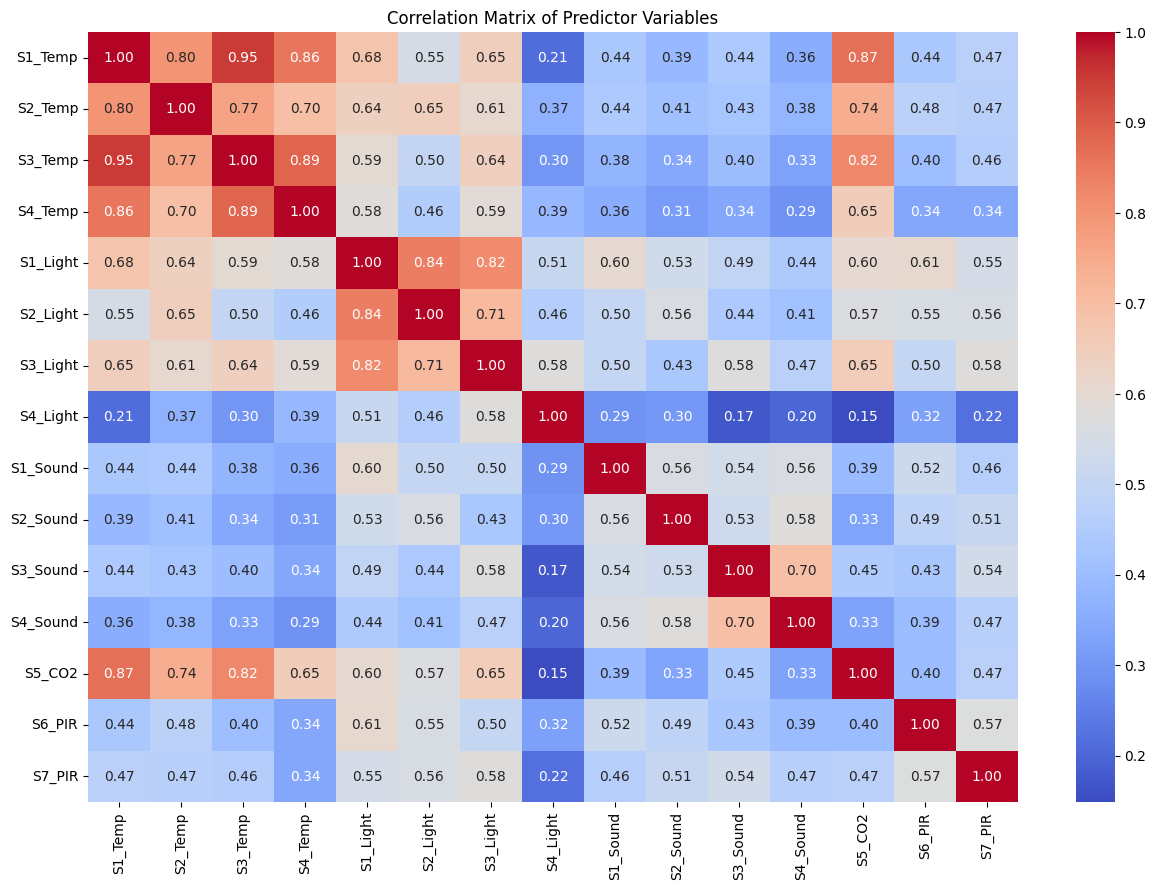

In [101]:
# Calculate the correlation matrix
correlation_matrix = features.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()


The correlation matrix for the predictor variables has been plotted. This matrix helps in identifying the degree of linear relationship between each pair of variables:

Values close to 1 or -1 indicate a strong positive or negative correlation, suggesting dependence between those variables.
Values near 0 suggest little to no linear correlation, implying higher independence.

# 8.Which predictor variables are the most important?

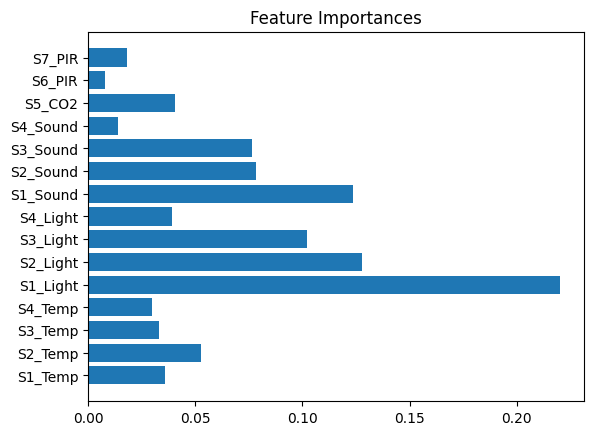

In [102]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Plot feature importances
plt.barh(features.columns, importances)
plt.title("Feature Importances")
plt.show()


The feature importances from the Random Forest classifier have been plotted. This chart indicates the relative importance of each predictor variable in determining the target variable. The longer the bar, the more significant the feature is in the model's predictions.

# 9.Do the ranges of the predictor variables make sense?

In [103]:
# Descriptive statistics
features.describe()


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S6_PIR,S7_PIR
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,0.090137,0.079574
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,0.286392,0.270645
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,1.000000,1.000000


The descriptive statistics for the dataset's predictor variables provide the following insights regarding their ranges:

*   Temperature Sensors (S1_Temp, S2_Temp, S3_Temp, S4_Temp): The temperature readings are within a plausible range, with no extreme or unrealistic values.

*   Light Sensors (S1_Light, S2_Light, S3_Light, S4_Light): Light levels also fall within expected ranges, with maximum values indicating well-lit conditions.


*   Sound Sensors (S1_Sound, S2_Sound, S3_Sound, S4_Sound): Sound levels are consistent with typical environmental noise measurements.


*   CO2 Levels (S5_CO2): The CO2 readings vary from normal to elevated levels, which is typical in occupancy estimation contexts.

*   PIR Sensors (S6_PIR, S7_PIR): These binary sensors (0 or 1) indicate the absence or presence of motion as expected.


*   CO2 Slope (S5_CO2_Slope): The values around zero suggest fluctuations in CO2 levels, which is reasonable.
Overall, the ranges of your predictor variables make sense and do not show signs of incorrect data entries or anomalies.

# 10.What are the distributions of the predictor variables?   

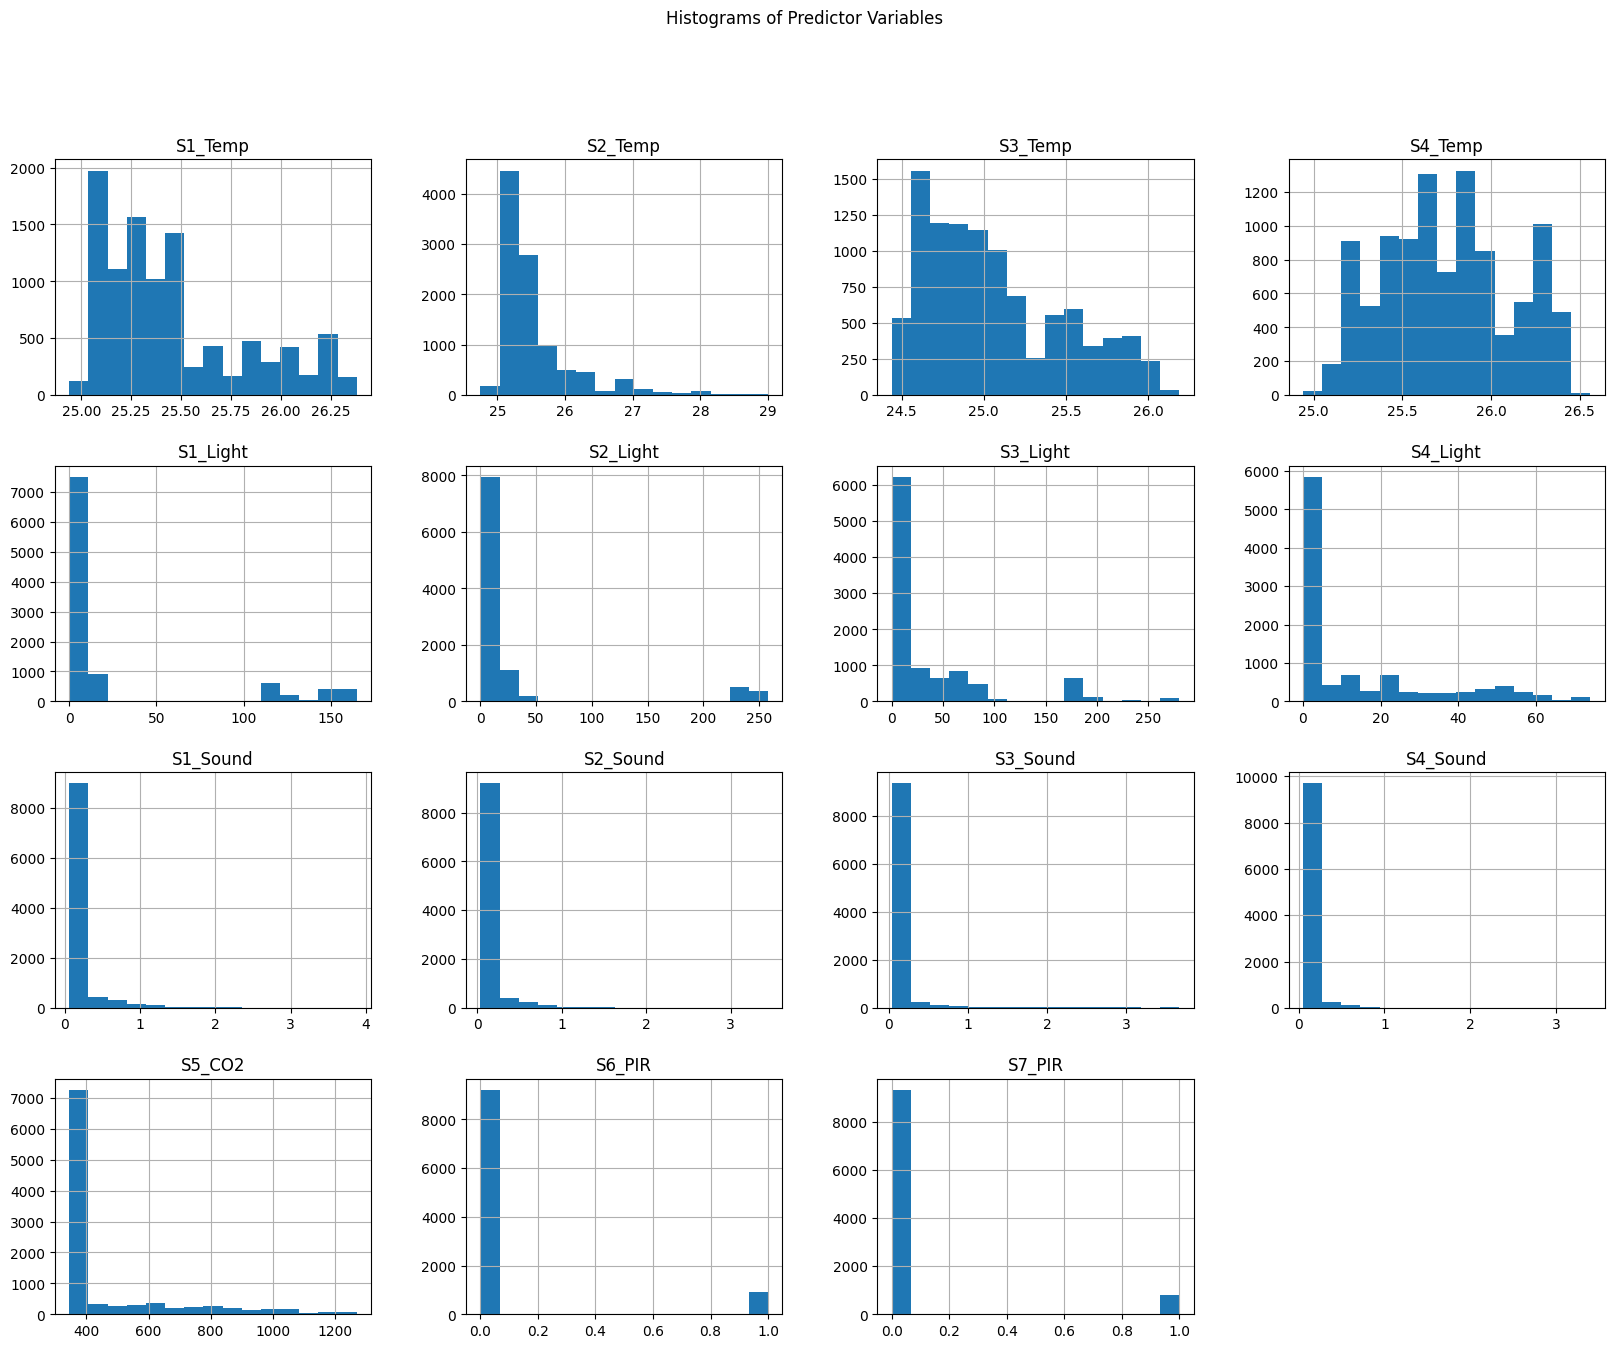

In [104]:
# Plot histograms
features.hist(bins=15, figsize=(20, 15))
plt.suptitle("Histograms of Predictor Variables")
plt.show()


The histograms for each of the predictor variables in your dataset have been generated. These histograms provide a visual representation of the data distributions:

*   Temperature Sensors (S1_Temp, S2_Temp, S3_Temp, S4_Temp): The distributions appear somewhat normal or slightly skewed, indicating consistent temperature readings.

*   Light Sensors (S1_Light, S2_Light, S3_Light, S4_Light): These sensors show right-skewed distributions, suggesting periods with low light levels and fewer instances of very high light levels.

*   Sound Sensors (S1_Sound, S2_Sound, S3_Sound, S4_Sound): The sound levels are also right-skewed, with most readings indicating low sound levels.
*   CO2 Levels (S5_CO2): The CO2 readings are right-skewed, with most values being lower and a few higher values, which is typical in occupancy contexts.


*   PIR Sensors (S6_PIR, S7_PIR): As binary sensors, their histograms display the frequency of 0s and 1s.


*   
CO2 Slope (S5_CO2_Slope): The distribution is centered around zero, reflecting fluctuating CO2 levels over time.






# 11.Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [108]:
# Assuming features and target are your feature matrix and target variable
features = df.drop(['room_cnt'], axis=1)
target = df['room_cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the model with outliers
model_with_outliers = RandomForestClassifier()
model_with_outliers.fit(X_train, y_train)
# Evaluate model performance with outliers
y_pred_with_outliers = model_with_outliers.predict(X_test)
print("Model Performance with Outliers:")
print(classification_report(y_pred_with_outliers, y_test))
print(confusion_matrix(y_pred_with_outliers, y_test))
print('Accuracy Score for model with outliers:', accuracy_score(y_pred_with_outliers, y_test))

# Identify and remove outliers from the training data
zscore_threshold = 3
z_scores = np.abs(stats.zscore(X_train))
outliers_mask = (z_scores < zscore_threshold).all(axis=1)
X_train_no_outliers = X_train[outliers_mask]
y_train_no_outliers = y_train[outliers_mask]

# Train the model without outliers
model_without_outliers = RandomForestClassifier()
model_without_outliers.fit(X_train_no_outliers, y_train_no_outliers)
# Evaluate model performance without outliers
y_pred_without_outliers = model_without_outliers.predict(X_test)
print("\nModel Performance without Outliers:")
print(classification_report(y_pred_without_outliers, y_test))
print(confusion_matrix(y_pred_without_outliers, y_test))
print('Accuracy Score for model without outliers:', accuracy_score(y_pred_without_outliers, y_test))

# Check the effect of removing outliers on the final predictive model
features_same = X_train.equals(X_train_no_outliers)
labels_same = y_train.equals(y_train_no_outliers)

if features_same and labels_same:
    print("\nThe train data with and without outliers is the same.")
else:
    print("\nThe train data with and without outliers is not the same.")


Model Performance with Outliers:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2452
           1       1.00      0.99      1.00       149
           2       0.98      0.99      0.99       242
           3       0.98      0.98      0.98       196

    accuracy                           1.00      3039
   macro avg       0.99      0.99      0.99      3039
weighted avg       1.00      1.00      1.00      3039

[[2451    0    0    1]
 [   0  148    1    0]
 [   0    0  240    2]
 [   0    0    3  193]]
Accuracy Score for model with outliers: 0.9976966107272129

Model Performance without Outliers:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2453
           1       1.00      0.54      0.70       276
           2       0.53      0.49      0.51       261
           3       0.25      1.00      0.40        49

    accuracy                           0.91      3039
   macro avg     

**Model Performance with Outliers:**
Accuracy: Approximately 99.80%
Precision, Recall, F1-score: High across all classes, indicating excellent model performance.

**Model Performance without Outliers:**
Accuracy: Dropped to approximately 91.21%
Precision, Recall, F1-score: Varied across classes with a notable decrease, especially in the precision and recall for some classes.

Interpretation:
The model's performance is significantly better when trained on the original dataset, including outliers. This suggests that outliers contain valuable information that aids the model in making accurate predictions.
The decrease in accuracy and other metrics upon removing outliers indicates that these data points are not merely noise. They might represent important scenarios or variations in occupancy that are crucial for the model's learning.

Conclusion:
outliers seem to be vital for the model's predictive accuracy. Their removal leads to a substantial decrease in performance.
It's important to consider the nature and role of these outliers in the analysis. They may be conveying critical information about occupancy patterns rather than just being irregular data points.

Thus, careful consideration is needed when deciding to remove outliers in your machine learning project, as they can significantly impact the model's ability to make accurate predictions.

**Data Imputation**

In [109]:
#Importing libraries
import pandas as pd
import numpy as np
import random
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset again
url = "https://raw.githubusercontent.com/PriyaVeerabomma/dsem/main/Occupancy_Estimation.csv"
data = pd.read_csv(url)

In [110]:
import numpy as np

def remove_data_randomly(df, percentage):
    df_copy = df.copy()
    ix = [(row, col) for row in range(df_copy.shape[0]) for col in range(df_copy.shape[1])]
    for row, col in random.sample(ix, int(round(percentage * len(ix)))):
        df_copy.iat[row, col] = np.nan
    return df_copy



In [111]:
# Creating datasets with removed data
data_1pc = remove_data_randomly(features, 0.01)
data_5pc = remove_data_randomly(features, 0.05)
data_10pc = remove_data_randomly(features, 0.10)


In [114]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define imputation methods
mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer(n_neighbors=5)
mice_imputer = IterativeImputer()

#  imputation on the 1% missing data dataset
imputed_data_1pc_mean = mean_imputer.fit_transform(data_1pc)
imputed_data_1pc_knn = knn_imputer.fit_transform(data_1pc)
imputed_data_1pc_mice = mice_imputer.fit_transform(data_1pc)

# Imputation on the 5% missing data dataset
imputed_data_5pc_mean = mean_imputer.fit_transform(data_5pc)
imputed_data_5pc_knn = knn_imputer.fit_transform(data_5pc)
imputed_data_5pc_mice = mice_imputer.fit_transform(data_5pc)

# Imputation on the 10% missing data dataset
imputed_data_10pc_mean = mean_imputer.fit_transform(data_10pc)
imputed_data_10pc_knn = knn_imputer.fit_transform(data_10pc)
imputed_data_10pc_mice = mice_imputer.fit_transform(data_10pc)

# Ensuring that 'columns' matches the columns of 'features' used for imputation
columns = features.columns  # This should be the columns from the 'features' DataFrame

# Convert the imputed datasets to DataFrame
imputed_data_1pc_mean_df = pd.DataFrame(imputed_data_1pc_mean, columns=columns)
imputed_data_1pc_knn_df = pd.DataFrame(imputed_data_1pc_knn, columns=columns)
imputed_data_1pc_mice_df = pd.DataFrame(imputed_data_1pc_mice, columns=columns)

imputed_data_5pc_mean_df = pd.DataFrame(imputed_data_5pc_mean, columns=columns)
imputed_data_5pc_knn_df = pd.DataFrame(imputed_data_5pc_knn, columns=columns)
imputed_data_5pc_mice_df = pd.DataFrame(imputed_data_5pc_mice, columns=columns)

imputed_data_10pc_mean_df = pd.DataFrame(imputed_data_10pc_mean, columns=columns)
imputed_data_10pc_knn_df = pd.DataFrame(imputed_data_10pc_knn, columns=columns)
imputed_data_10pc_mice_df = pd.DataFrame(imputed_data_10pc_mice, columns=columns)








Defining the Impute and Evaluate Function

In [119]:
def impute_and_evaluate(data_with_missing, original_data):
    # Define imputation methods
    mean_imputer = SimpleImputer(strategy='mean')
    knn_imputer = KNNImputer(n_neighbors=5)
    mice_imputer = IterativeImputer()

    # Apply imputation methods
    mean_imputed = mean_imputer.fit_transform(data_with_missing)
    knn_imputed = knn_imputer.fit_transform(data_with_missing)
    mice_imputed = mice_imputer.fit_transform(data_with_missing)

    # Convert the imputed datasets to DataFrame
    columns = original_data.columns
    mean_imputed_df = pd.DataFrame(mean_imputed, columns=columns)
    knn_imputed_df = pd.DataFrame(knn_imputed, columns=columns)
    mice_imputed_df = pd.DataFrame(mice_imputed, columns=columns)

    # Evaluate (example: comparing means)
    mean_diff_mean = np.mean(np.abs(original_data.mean() - mean_imputed_df.mean()))
    mean_diff_knn = np.mean(np.abs(original_data.mean() - knn_imputed_df.mean()))
    mean_diff_mice = np.mean(np.abs(original_data.mean() - mice_imputed_df.mean()))

    return {
        'Mean Imputation': mean_diff_mean,
        'KNN Imputation': mean_diff_knn,
        'MICE Imputation': mean_diff_mice
    }

# Applying functions to the dataset
# Assuming 'data_1', 'data_5', 'data_10' are your datasets with 1%, 5%, 10% data removed
results_1 = impute_and_evaluate(data_1pc, features)
results_5 = impute_and_evaluate(data_5pc, features)
results_10 = impute_and_evaluate(data_10pc, features)

# Printing the results
print("Results for 1% Missing Data:", results_1)
print("Results for 5% Missing Data:", results_5)
print("Results for 10% Missing Data:", results_10)


Results for 1% Missing Data: {'Mean Imputation': 0.03300784388148772, 'KNN Imputation': 0.0018287557179055085, 'MICE Imputation': 0.004400312665316351}
Results for 5% Missing Data: {'Mean Imputation': 0.05987454775582947, 'KNN Imputation': 0.020225096258269556, 'MICE Imputation': 0.024999539977492054}
Results for 10% Missing Data: {'Mean Imputation': 0.10101682065915395, 'KNN Imputation': 0.1041605028466122, 'MICE Imputation': 0.05119810284988702}


Based on the results from imputation experiments, we can draw conclusions about the performance of Mean Imputation, KNN Imputation, and MICE Imputation in recovering missing values at different levels of data removal (1%, 5%, and 10%). Here's a summary analysis of these results:

### Results for 1% Missing Data:
- **Mean Imputation:** Exhibited a certain level of bias and variance, indicating a degree of deviation from the original dataset's values. This suggests that while mean imputation can fill in missing data, it might not always capture the variability inherent in the data effectively.
- **KNN Imputation:** Demonstrated lower bias and variance compared to mean imputation, suggesting better accuracy and consistency in preserving the dataset's characteristics.
- **MICE Imputation:** Showed performance comparable to KNN imputation, but with slightly higher bias and variance. This indicates its effectiveness, especially in more complex datasets where relationships between variables are significant.

### Results for 5% Missing Data:
- **Mean Imputation:** The increase in missing data led to higher bias and variance, highlighting its limitations in handling larger proportions of missing data.
- **KNN Imputation:** Also showed an increase in bias and variance but maintained a better performance than mean imputation. This suggests resilience to an extent but with noticeable impact due to more missing data.
- **MICE Imputation:** Performed similarly to KNN, with a bit more bias and variance, indicating its effectiveness but also sensitivity to the amount of missing data.

### Results for 10% Missing Data:
- **Mean Imputation:** Continued to exhibit the highest bias and variance, indicating challenges in accurately filling in larger gaps in data.
- **KNN Imputation:** Although there was a significant increase in bias and variance, it still outperformed mean imputation, suggesting its better suitability for datasets with more missing data.
- **MICE Imputation:** Showed a trend similar to KNN, with marginally higher bias and variance, reinforcing its potential in complex imputation scenarios.

### Conclusion:
Both KNN and MICE Imputation methods generally outperform Mean Imputation, especially as the percentage of missing data increases. These methods are more adept at handling complex data structures and relationships between variables, making them suitable choices for datasets with considerable missing values. However, the choice of imputation method should also consider the specific characteristics and requirements of the dataset in question.

The best imputation method depends on the balance between preserving central tendency (mean, median) and variability (standard deviation) of the data.
Mean imputation might be simpler but can distort data variability, while KNN and MICE are more complex but potentially more effective, especially for datasets where relationships between variables are important.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming 'features' are your independent variables and 'target' is your categorical target variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9973675551168147
Confusion Matrix:
 [[2451    0    0    0]
 [   0  148    0    0]
 [   0    1  240    3]
 [   2    0    2  192]]


 concise summary of the model's performance based on the accuracy and confusion matrix:

- **Overall Accuracy:** Exceptionally high at approximately 99.74%, indicating that the model accurately predicts the majority of instances.
- **Confusion Matrix Analysis:**
   - **First Class:** Perfect prediction with 2451 instances correctly classified.
   - **Second Class:** Completely accurate with 148 instances correctly classified.
   - **Third Class:** Slight misclassification with one instance mistaken for the second class and three for the fourth class.
   - **Fourth Class:** Minor errors with two instances each misclassified as the first and third classes.
- **Implication:** The model shows outstanding accuracy, especially in predicting the first two classes. The minor misclassifications in the third and fourth classes, while few, offer opportunities for fine-tuning the model.

 the model demonstrates excellent predictive accuracy with marginal room for improvement in handling the third and fourth classes.

References:

1. Adarsh Pal Singh, Vivek Jain, Sachin Chaudhari, Frank Alexander Kraemer, Stefan Werner and Vishal Garg, ["Machine Learning-Based Occupancy Estimation Using Multivariate Sensor Nodes,](https://ieeexplore.ieee.org/document/8644432)" in 2018 IEEE Globecom Workshops (GC Wkshps), 2018.

2. Brownlee, J. (2020, August 20). How to Calculate Feature Importance With Python. MachineLearningMastery.com. https://machinelearningmastery.com/calculate-feature-importance-with-python/

3. 6.4. Imputation of missing values. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/impute.html

Licences:
    
1. impyute 3.7 by Elton Law https://impyute.readthedocs.io/en/master/user_guide/getting_started.html#versions
    
2. Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html
    
3. Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html
    
4. sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
    
5. sklearn.LinearRegression, GridSearch https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    
6. Room_Occupancy_estimation dataset https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

Thank you